###Name: Jeremy John R. Orlina     

###Section: CPE-22S3

###Instructor: Engr. Roman M. Richard

Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.
Resources:


Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv
Procedures:

Procedures:
* 9.1 Introduction to Matplotlib
- https://colab.research.google.com/drive/1QuEu0knOq0TUpM2iHzBufVL6HsMY0quq?usp=sharing
* 9.2 Plotting with Pandas
- https://colab.research.google.com/drive/1CuzB3l7HUuWMVILtNRkshjZzGJ5PqoX9?usp=sharing
* 9.3 Pandas Plotting Subpackage
- https://colab.research.google.com/drive/1iY1phpn8DvdQq8YCZc_I1rVjxSSSD8VO?usp=sharing

Data Analysis:

Provide comments on output from the procedures above.

Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv('/content/fb_stock_prices_2018.csv')
quakes = pd.read_csv('/content/earthquakes.csv')

Axes(0.125,0.2;0.775x0.68)


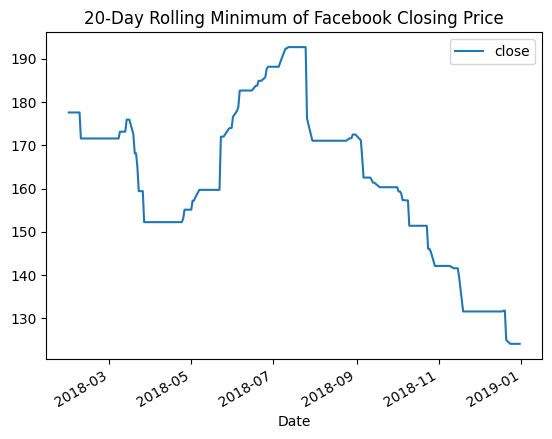

In [31]:
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)
rolling_20d_min = fb['close'].rolling(window=20).min()
print(rolling_20d_min.plot(title='20-Day Rolling Minimum of Facebook Closing Price', xlabel='Date', legend = True))


2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

<Axes: ylabel='Density'>

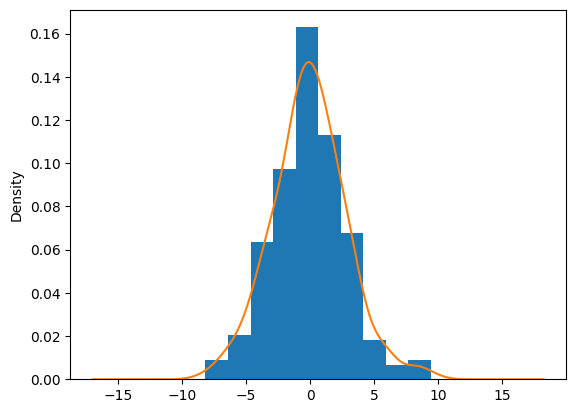

In [59]:
change = fb[['open', 'close']].copy()
change['change'] = change['open'] - change['close']
histo = change.change.plot(kind = 'hist', density = True)
change.change.plot(ax = histo, kind = 'kde')

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Text(0.5, 1.1, 'Magnitudes of each magType used in Indonesia')

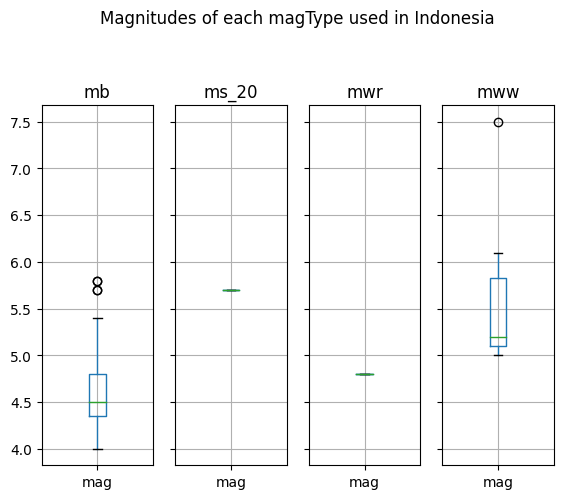

In [48]:
indo = quakes.loc[quakes.parsed_place == 'Indonesia']
indo.groupby('magType').boxplot(column = 'mag', layout = (1,4))

plt.suptitle('Magnitudes of each magType used in Indonesia', y=1.1)

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

<Axes: title={'center': 'Difference between the weekly maximum high price and the weekly minimum low price for Facebook'}, xlabel='date'>

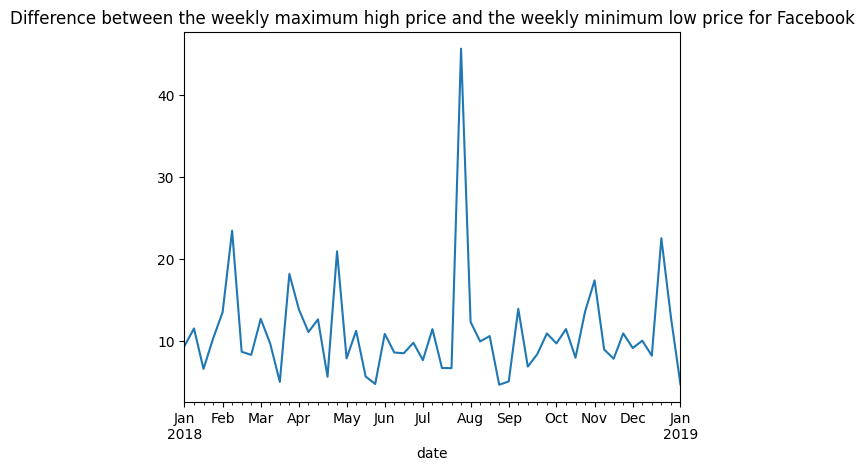

In [55]:
weekMax = fb.high.resample('W').max()
weekMin = fb.low.resample('W').min()
diff = weekMax - weekMin
diff.plot(title = 'Difference between the weekly maximum high price and the weekly minimum low price for Facebook')

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

* The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

* The second subplot will be a bar plot showing the net effect this had monthly, using resample().

* Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

* Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

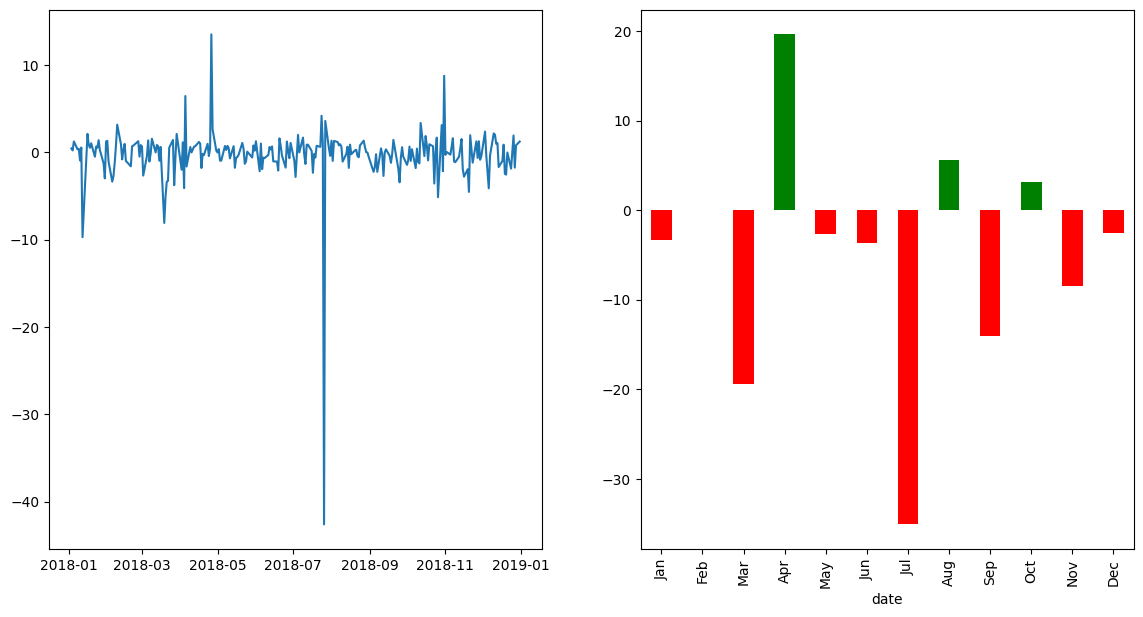

In [64]:
dailyDiff = fb.assign(beforeClose= lambda x: x.close.shift(), after=lambda x: x.open - x.beforeClose, change= lambda x: x.after.abs())

fig = plt.figure(figsize = (14,7))
grid = fig.add_gridspec(1,2)
left = fig.add_subplot(grid[0,0])
right = fig.add_subplot(grid[0,1])

left.plot(dailyDiff.index, dailyDiff.after)
showEffect = dailyDiff.after.resample('M').sum()


colors = ['red' if value < 0 else 'green' for value in showEffect]
showEffect.plot(kind = 'bar', ax = right, color = colors)

right.set_xticklabels(showEffect.index.strftime('%b'))

##Summary/Conclusion:

Understanding complicated data sets and seeing trends or patterns that might not be immediately obvious from raw data alone are made easier with the help of data visualization. Data visualization makes information easier to understand and communicate. Using the fundamentals from Module 9 enables me to finish this task successfully.